In [9]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import (RocCurveDisplay, accuracy_score, auc, f1_score,
                             precision_score, recall_score, roc_auc_score,
                             roc_curve)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

warnings.simplefilter(action='ignore', category=FutureWarning)


- Here we plot the class distribution of the given dataset
- We plot the histogram of the classes
- We then plot the histograms of rest of the features to get a better understanding of the data.


In [10]:
reader = pd.read_excel('Dry_Bean_Dataset.xlsx')
df = pd.DataFrame(reader)
df.head()
df1 = df.drop(["Class"], axis=1)
tempClass = df["Class"]
gaussian = GaussianNB()
sc = StandardScaler()


<AxesSubplot:>

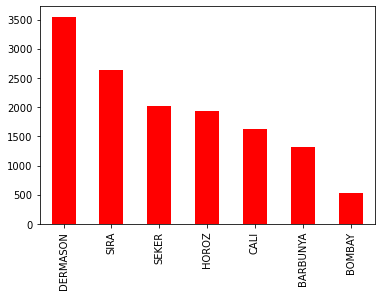

In [11]:
df["Class"].value_counts().plot(kind='bar', color='red')

<AxesSubplot:>

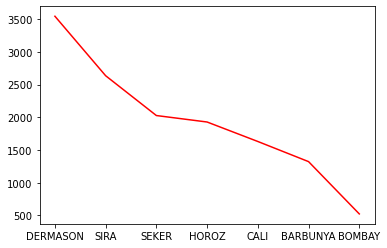

In [12]:
df["Class"].value_counts().plot(kind='line', color='red')

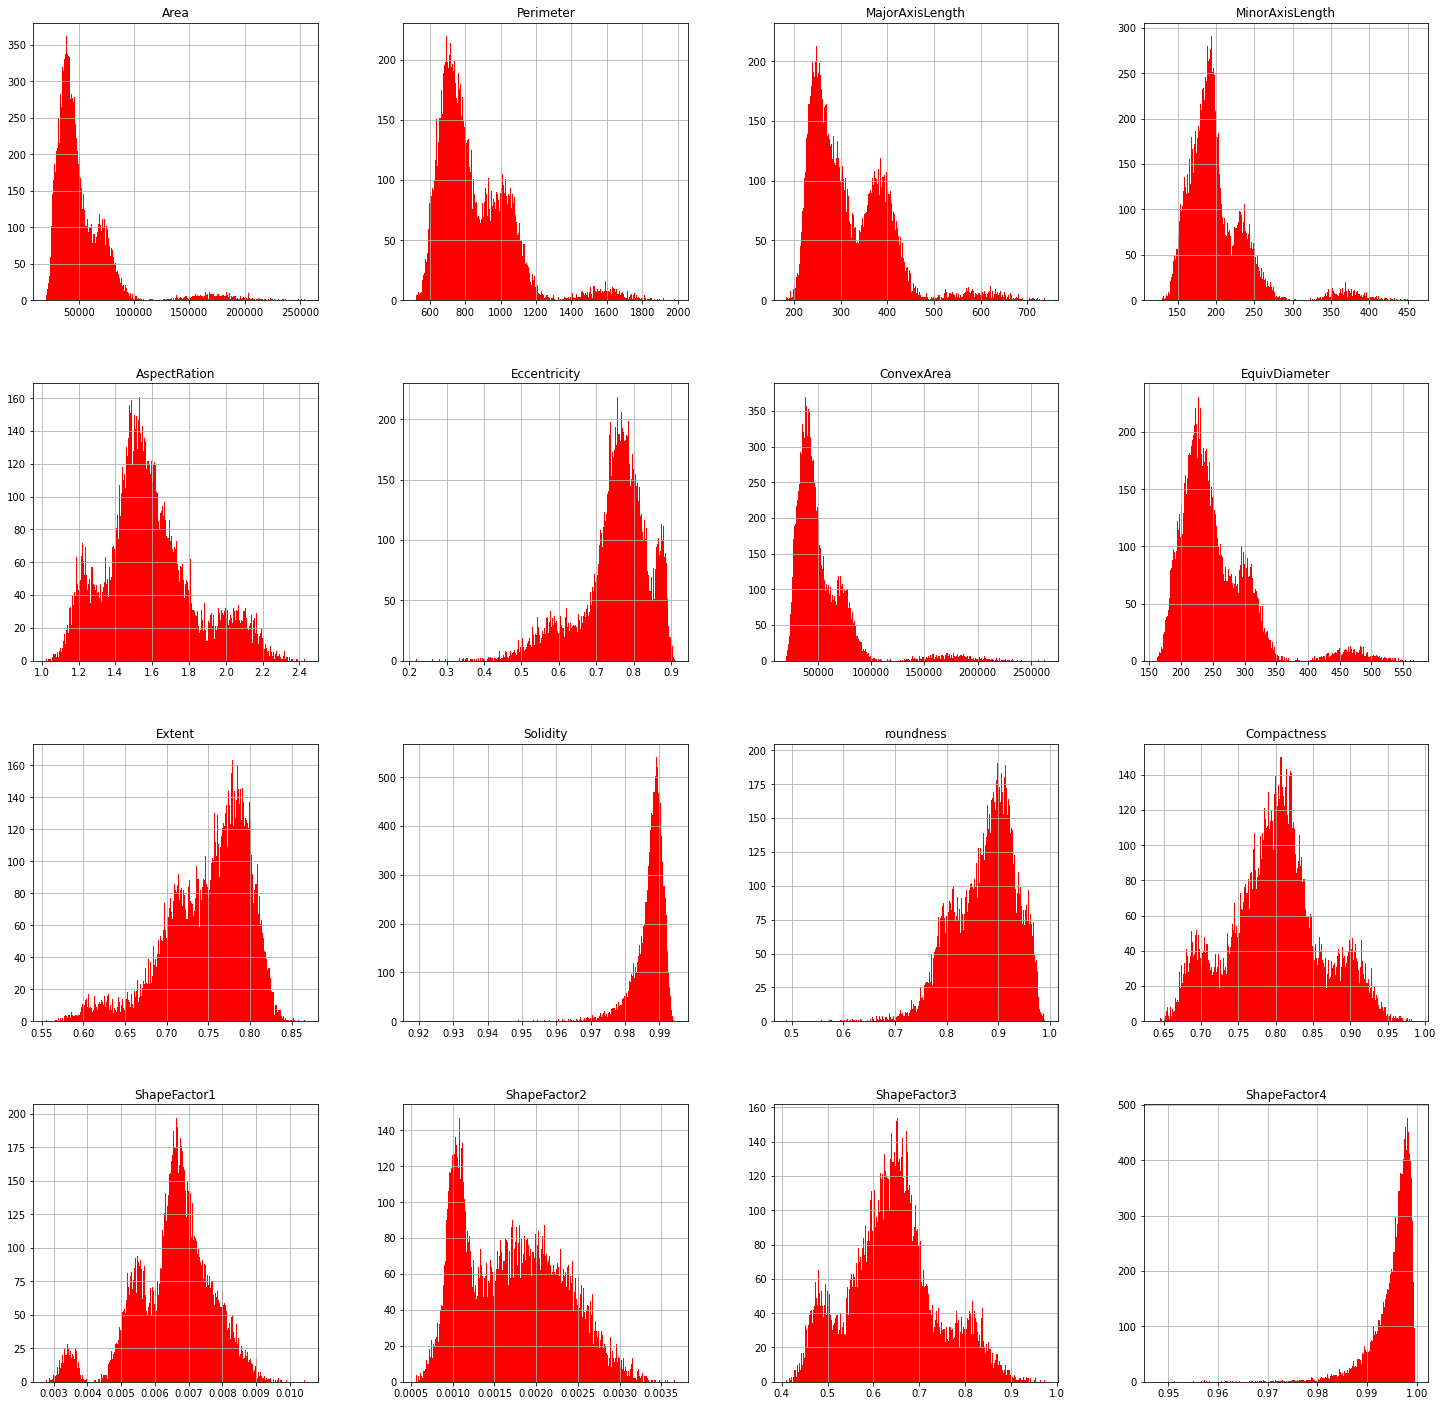

In [13]:
x = df.hist(bins=300, figsize=(25, 25), color='red')


--------------------------------------------------------
- We do a Exploratory Data Analysis on the dataset to get useful insights.
- We will use boxplot to see the outliers in the data.
- We will use scatterplot to see the Area and Perimeter relations with respect to the classes.
- Finally we will use pairplot to see the correlation between different features.
- We observe that there are outliers in the data.
- There are no null values and 68 repeated values in our data

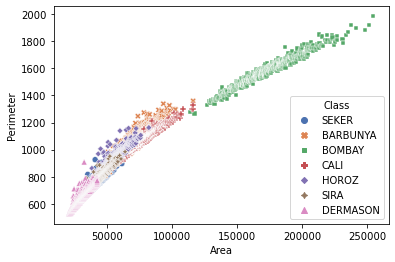

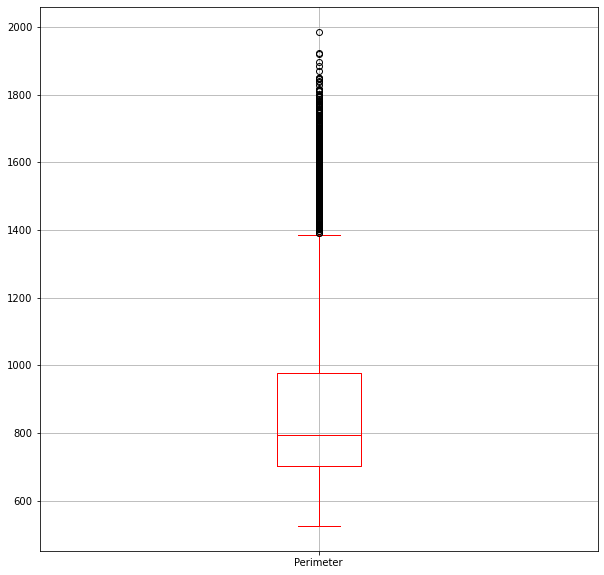

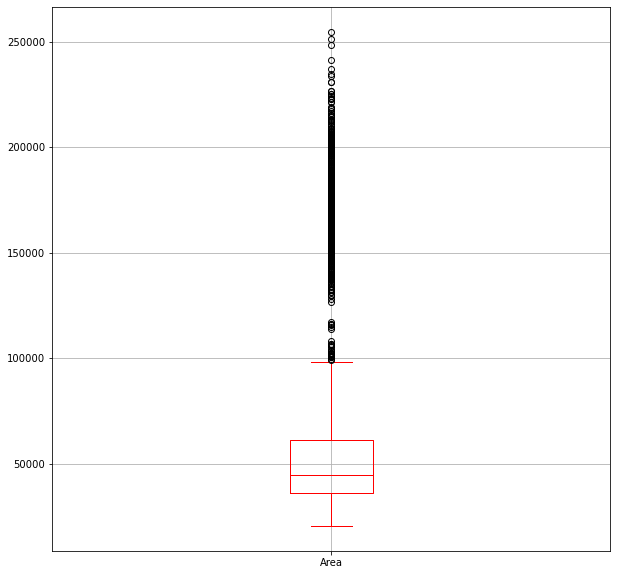

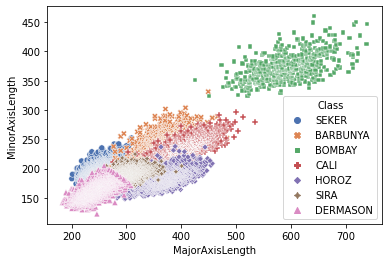

The number of duplicated values in the dataset are:  68
The number of null values in the dataset are:  0


In [20]:
sns.scatterplot(data=df, x='Area', y='Perimeter',
                hue='Class', palette='deep', style='Class')
plt.show()
df[["Perimeter"]].boxplot(color='red', figsize=(10, 10), grid=True)
plt.show()
df[["Area"]].boxplot(color='red', figsize=(10, 10), grid=True)
plt.show()

sns.scatterplot(data=df, x='MajorAxisLength', y='MinorAxisLength',
                hue='Class', palette='deep', style='Class')
plt.show()
sns.pairplot(df, hue='Class', palette='deep', diag_kind='hist')
plt.show()
print("The number of duplicated values in the dataset are: ", df.duplicated().sum())
print("The number of null values in the dataset are: ", df.isnull().sum().sum())


  -----------------------------------------------------------
- We apply TSNE to reduce the dimensions of the data to 2.
- We plot the data as a scatter plot to see the clusters.
- We observe that the data is not linearly separable as there exists no clear boundary between the classes.


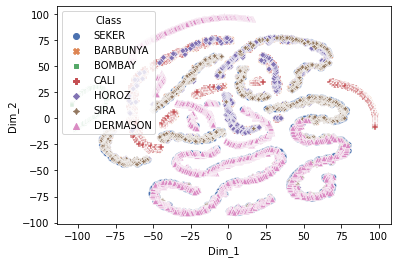

In [21]:
tsne = TSNE(random_state=2, perplexity=30, n_iter=1000)
res = tsne.fit_transform(df1)
res = np.vstack((res.T, tempClass))
res = res.T
dfTsne = pd.DataFrame(data=res, columns=("Dim_1", "Dim_2", "Class"))
sns.scatterplot(data=dfTsne, x="Dim_1", y="Dim_2", hue="Class",
                palette='deep', style='Class', legend='full')
plt.show()


- We train two Naive Bayes classifiers on the data to get the class output given the features.
- We make a 80:20 train test split to test the performance of our model.
- Gaussian and Multinomial Naive Bayes is used as the classifiers here.

In [ ]:
trainX, testX, trainY, testY = train_test_split(
    df1, tempClass, test_size=0.2, random_state=0)
trainX = sc.fit_transform(trainX)
testX = sc.transform(testX)


In [ ]:
def printRes(precisionScore, recallScore, accuracyScore, modelName):
    print("Results of", modelName, "Naive Bayes are as follows:")
    print("The model's precision is :", precisionScore)
    print("The model's recall is :", recallScore)
    print("The model's accuracy is :", accuracyScore)

In [ ]:

# Using Gaussian Naive Bayes
gaussian.fit(trainX, trainY)
predictedY = gaussian.predict(testX)

precisionScore = precision_score(
    testY, predictedY, average='weighted').round(3)
recallScore = recall_score(testY, predictedY, average='weighted').round(3)
accuracyScore = accuracy_score(testY, predictedY).round(3)

printRes(precisionScore, recallScore, accuracyScore, "Gaussian")


In [ ]:
# Now using the Multinomial Naive Bayes

trainX, testX, trainY, testY = train_test_split(
    df1, tempClass, test_size=0.2, random_state=0)
multinomial = MultinomialNB()
multinomial.fit(trainX, trainY)
predictedY = multinomial.predict(testX)
multinomial = MultinomialNB()
multinomial.fit(trainX, trainY)
predictedY = multinomial.predict(testX)
precisionScore = precision_score(
    testY, predictedY, average='weighted').round(3)
recallScore = recall_score(testY, predictedY, average='weighted').round(3)
accuracyScore = accuracy_score(testY, predictedY).round(3)
printRes(precisionScore, recallScore, accuracyScore, "Multinomial")

----------------------------------------------
- Here we use Principal Component Analysis (PCA) to reduce the dimensions of the data to a given number of components.
- We use the same train test split as before.
- We observe as the PCA componenets increase the data loss increases and the accuracy decreases.

In [ ]:
logistic = LogisticRegression(max_iter=50000, random_state=2)
trainX = sc.fit_transform(trainX)
testX = sc.transform(testX)


In [ ]:
def getPCA(n):
    resPCA = PCA(n_components=n)
    trainXpca = resPCA.fit_transform(trainX)
    testXpca = resPCA.transform(testX)
    logistic.fit(trainXpca, trainY)
    predictedY = logistic.predict(testXpca)
    variance = np.sum(resPCA.explained_variance_ratio_)
    Accuracy = accuracy_score(testY, predictedY)
    Precision = precision_score(testY, predictedY, average='weighted')
    Recall = recall_score(testY, predictedY, average='weighted')
    F1 = f1_score(testY, predictedY, average='weighted')
    print("number of components are", n)
    print("variance is ", variance)
    print("Accuracy is ", Accuracy)
    print("Precision is ", Precision)
    print("Recall is ", Recall)
    print("F1 is ", F1)
    print("")


for i in range(4, 11, 2):
    getPCA(i)


  --------------------------------------------------
- We now plot the ROC and AUC curves.
- We train the model using Logistic Regression function of Sklearn.
- We use the SK-Learn's roc_curve and auc functions to get the ROC and AUC values.

In [ ]:
colors = []
for i in range(15):
    colors.append('#%06X' % np.random.randint(0, 0xFFFFFF))
myClass = list(set(tempClass))


def plot(i):
    df2 = df.copy()
    df2['Class'] = df2['Class'].apply(lambda x: 1 if x == myClass[i] else 0)
    df3 = df2.drop('Class', axis=1)
    tempClass2 = df2['Class']
    trainX, testX, trainY, testY = train_test_split(
        df3, tempClass2, test_size=0.2, random_state=2)
    resPCA = PCA(n_components=8)
    trainX = resPCA.fit_transform(trainX)
    testX = resPCA.transform(testX)
    gaussian.fit(trainX, trainY)
    probY = gaussian.predict_proba(testX)[:, 1]
    fpr, tpr, _ = roc_curve(testY, probY)
    rocAUC = roc_auc_score(testY, probY)
    plt.plot(fpr, tpr, color=colors[i], label='ROC curve of class {0} (area is {1:0.3f})'.format(
        myClass[i], rocAUC))


In [ ]:
for i in range(len(myClass)):
    plot(i)
plt.legend(loc='lower right')
plt.title('The ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


--------------------------------------------------
- We now train and test the model using logistic regression implementation of Sklearn


In [23]:
logistic.fit(trainX, trainY)
predictedY = logistic.predict(testX)
precisionScore = precision_score(
    testY, predictedY, average='weighted').round(3)
recallScore = recall_score(testY, predictedY, average='weighted').round(3)
accuracyScore = accuracy_score(testY, predictedY).round(3)

print("Results of Logistic regression are as follows:")
print("The model's precision is :", precisionScore)
print("The model's recall is :", recallScore)
print("The model's accuracy is :", accuracyScore)


NameError: name 'logistic' is not defined